## Overview of the code within our project


#### 1. Data Cleaning & Webscrapping
This section will review the data cleaning and webscrapping process.
#### 2. Analysis 
The analysis section will discuss core questions we will address.
#### 3. Visualizations
Visualizations will help answer the analysis and be explained why we used the specific graphical representation.


## Section 1: Webscrapping & Data Cleaning


In [1]:
#importing software libraries 
#assigining websites to variable names
import pandas as pd
import requests as rq
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import datetime
paging = requests.get("https://www.the-numbers.com/movie/budgets/all")
paging_2 =requests.get('https://www.the-numbers.com/movie/budgets/all/101')
paging_3 = requests.get('https://www.the-numbers.com/movie/budgets/all/201')
paging_4 = requests.get('https://www.the-numbers.com/movie/budgets/all/301')
paging_5 = requests.get('https://www.the-numbers.com/movie/budgets/all/401')
compete = requests.get("https://www.boxofficemojo.com/brand/?sort=totalGross&ref_=bo_bns__resort#table")
page_2 = requests.get('https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-specific-technical-role/director')
page_year = requests.get('https://www.the-numbers.com/movies/#tab=year')


In [2]:
#importing BeautifulSoup
#Assigning new variables using BeautifulSoup 
from bs4 import BeautifulSoup
souping = BeautifulSoup(paging.content, 'html.parser')
souping_2 =BeautifulSoup(paging_2.content, 'html.parser')
souping_3 =BeautifulSoup(paging_3.content, 'html.parser')
souping_4 = BeautifulSoup(paging_4.content, 'html.parser')
souping_5 =BeautifulSoup(paging_5.content, 'html.parser')
soup_compete = BeautifulSoup(compete.content, 'html.parser')
souped = BeautifulSoup(page_2.content, 'html.parser')
soup_year = BeautifulSoup(page_year.content, 'html.parser')

In [3]:
list(soup_compete.children)
list(souping.children)
list(souping_2.children)
list(souping_3.children)
list(souping_4.children)
list(souping_5.children)
list(souped.children)
list(soup_year.children)

['html',
 '\n',
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <!-- Global site tag (gtag.js) - Google Analytics -->
 <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1"></script>
 <script>
   window.dataLayer = window.dataLayer || [];
   function gtag(){dataLayer.push(arguments);}
   gtag('js', new Date());
 
   gtag('config', 'UA-1343128-1');
 </script>
 <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
 <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="telephone=no" name="format-detection"/> <!-- for apple mobile -->
 <meta content="521546213" property="fb:admins">
 <meta content


### For loops to help coerce the data

In [4]:
listsoup_compete= []
for record in soup_compete.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listsoup_compete.append(row)
print(listsoup_compete)

[[], ['Marvel Comics', '$14,222,359,290', '60', 'Avengers: Endgame', '$858,373,000'], ['Legendary Pictures', '$6,918,142,562', '55', 'Jurassic World', '$652,270,625'], ['Lucasfilm', '$6,322,540,918', '38', 'Star Wars: Episode VII - The Force Awakens', '$936,662,225'], ['Pixar', '$6,075,570,662', '25', 'Incredibles 2', '$608,581,744'], ['DC Comics', '$5,713,151,081', '44', 'The Dark Knight', '$533,345,358'], ['DreamWorks Animation', '$5,658,603,427', '37', 'Shrek 2', '$441,226,247'], ['Bad Robot', '$3,077,078,931', '15', 'Star Wars: Episode VII - The Force Awakens', '$936,662,225'], ['Vertigo Entertainment', '$3,053,748,082', '40', 'It', '$327,481,748'], ['Walt Disney Animation Studios', '$2,624,970,738', '12', 'Frozen II', '$477,373,578'], ['Illumination Entertainment', '$2,610,640,345', '10', 'The Secret Life of Pets', '$368,384,330'], ['Blumhouse Productions', '$2,308,939,819', '47', 'Get Out', '$176,040,665'], ['Hasbro', '$2,051,221,499', '16', 'Transformers: Revenge of the Fallen',

In [5]:
listed= []
for record in souped.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listed.append(row)
print(listed)

[['Best known as an Executive Producer based on credits in that role in 49 films.'], ['Top films contributed to this record:\nJurassic Park ($1,045,627,627 in 1993),  ET: The Extra-Terrestrial ($792,965,326 in 1982),  Indiana Jones and the Kingdom of the Crystal Skull ($786,635,413 in 2008),  The Lost World: Jurassic Park ($618,638,999 in 1997),  War of the Worlds ($606,836,535 in 2005),  Ready Player One ($579,290,136 in 2018),  Saving Private Ryan ($485,035,085 in 1998),  Indiana Jones and the Last Crusade ($474,171,806 in 1989),  Jaws ($470,700,000 in 1975),  The Adventures of Tintin ($373,993,951 in 2011)'], ['Best known as a Director based on credits in that role in 6 films.'], ['Top films contributed to this record:\nAvengers: Endgame ($2,797,800,564 in 2019),  Avengers: Infinity War ($2,048,359,754 in 2018),  Captain America: Civil War ($1,153,284,349 in 2016),  Captain America: The Winter Soldier ($714,401,889 in 2014),  You, Me and Dupree ($130,402,010 in 2006),  Cherry ($0 in

In [6]:
listing= []
for record in souping.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listing.append(row)
print(listing)

[[], ['1', 'Apr 23, 2019', 'Avengers: Endgame', '\xa0$400,000,000', '\xa0$858,373,000', '\xa0$2,797,800,564'], ['2', 'May 20, 2011', 'Pirates of the Caribbean: On Stranger Tides', '\xa0$379,000,000', '\xa0$241,063,875', '\xa0$1,045,663,875'], ['3', 'Apr 22, 2015', 'Avengers: Age of Ultron', '\xa0$365,000,000', '\xa0$459,005,868', '\xa0$1,396,099,202'], ['4', 'Dec 16, 2015', 'Star Wars Ep. VII: The Force Awakens', '\xa0$306,000,000', '\xa0$936,662,225', '\xa0$2,068,223,624'], ['5', 'Apr 25, 2018', 'Avengers: Infinity War', '\xa0$300,000,000', '\xa0$678,815,482', '\xa0$2,048,359,754'], ['6', 'May 24, 2007', 'Pirates of the Caribbean: At Worldâ\x80\x99s End', '\xa0$300,000,000', '\xa0$309,420,425', '\xa0$963,420,425'], ['7', 'Nov 13, 2017', 'Justice League', '\xa0$300,000,000', '\xa0$229,024,295', '\xa0$655,945,209'], ['8', 'Oct 6, 2015', 'Spectre', '\xa0$300,000,000', '\xa0$200,074,175', '\xa0$879,620,923'], ['9', 'Dec 18, 2019', 'Star Wars: The Rise of Skywalker', '\xa0$275,000,000', '\

In [7]:
listing_2= []
for record in souping_2.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listing_2.append(row)
print(listing_2)

[[], ['101', 'Jul 16, 2018', 'Mission: Impossibleâ\x80\x94Fallout', '\xa0$178,000,000', '\xa0$220,159,104', '\xa0$787,456,552'], ['102', 'May 18, 2016', 'X-Men: Apocalypse', '\xa0$178,000,000', '\xa0$155,442,489', '\xa0$542,537,546'], ['103', 'Aug 9, 2018', 'The Meg', '\xa0$178,000,000', '\xa0$145,443,742', '\xa0$529,530,715'], ['104', 'May 28, 2014', 'Edge of Tomorrow', '\xa0$178,000,000', '\xa0$100,206,256', '\xa0$370,541,256'], ['105', 'Mar 6, 2019', 'Captain Marvel', '\xa0$175,000,000', '\xa0$426,829,839', '\xa0$1,129,729,839'], ['106', 'Apr 7, 2016', 'The Jungle Book', '\xa0$175,000,000', '\xa0$364,001,123', '\xa0$962,854,547'], ['107', 'Jun 12, 2015', 'Inside Out', '\xa0$175,000,000', '\xa0$356,461,711', '\xa0$857,561,711'], ['108', 'Jul 5, 2017', 'Spider-Man: Homecoming', '\xa0$175,000,000', '\xa0$334,201,140', '\xa0$880,166,350'], ['109', 'Aug 2, 2016', 'Suicide Squad', '\xa0$175,000,000', '\xa0$325,100,054', '\xa0$746,846,894'], ['110', 'May 28, 2009', 'Up', '\xa0$175,000,000'

In [8]:
listing_3= []
for record in souping_3.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listing_3.append(row)
print(listing_3)

[[], ['201', 'Nov 16, 2007', 'Beowulf', '\xa0$150,000,000', '\xa0$82,280,579', '\xa0$195,080,579'], ['202', 'May 9, 2012', 'Dark Shadows', '\xa0$150,000,000', '\xa0$79,727,149', '\xa0$238,202,668'], ['203', 'Jun 28, 2013', 'White House Down', '\xa0$150,000,000', '\xa0$73,103,784', '\xa0$205,440,387'], ['204', 'Feb 12, 2010', 'The Wolfman', '\xa0$150,000,000', '\xa0$62,189,884', '\xa0$142,634,358'], ['205', 'Dec 15, 2016', 'The Great Wall', '\xa0$150,000,000', '\xa0$45,157,105', '\xa0$334,486,852'], ['206', 'Sep 25, 2015', 'Pan', '\xa0$150,000,000', '\xa0$35,088,320', '\xa0$151,525,973'], ['207', 'Mar 11, 2011', 'Mars Needs Moms', '\xa0$150,000,000', '\xa0$21,392,758', '\xa0$39,549,758'], ['208', '2021', 'Moonfall', '\xa0$150,000,000', '\xa0$0', '\xa0$0'], ['209', 'Nov 3, 2006', 'Flushed Away', '\xa0$149,000,000', '\xa0$64,665,672', '\xa0$179,357,126'], ['210', 'Jun 8, 2012', "Madagascar 3: Europe's Most Wanted", '\xa0$145,000,000', '\xa0$216,391,482', '\xa0$746,921,271'], ['211', 'Dec 

In [9]:
listing_4= []
for record in souping_4.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listing_4.append(row)
print(listing_4)

[[], ['301', 'May 24, 2000', 'Mission: Impossible 2', '\xa0$120,000,000', '\xa0$215,409,889', '\xa0$549,588,516'], ['302', 'Jun 30, 2000', 'The Perfect Storm', '\xa0$120,000,000', '\xa0$182,618,434', '\xa0$328,711,434'], ['303', 'Jul 20, 2016', 'Jason Bourne', '\xa0$120,000,000', '\xa0$162,192,920', '\xa0$416,168,316'], ['304', 'Jun 15, 2007', 'Fantastic Four: Rise of the Silver Surfer', '\xa0$120,000,000', '\xa0$131,921,738', '\xa0$289,480,691'], ['305', 'Nov 21, 2012', 'Life of Pi', '\xa0$120,000,000', '\xa0$124,987,022', '\xa0$620,912,003'], ['306', 'Feb 16, 2007', 'Ghost Rider', '\xa0$120,000,000', '\xa0$115,802,596', '\xa0$229,545,589'], ['307', 'Apr 9, 2018', 'Rampage', '\xa0$120,000,000', '\xa0$101,028,233', '\xa0$428,028,233'], ['308', 'Jun 27, 2003', "Charlie's Angels: Full Throttle", '\xa0$120,000,000', '\xa0$100,814,328', '\xa0$227,200,000'], ['309', 'Aug 9, 2013', 'Elysium', '\xa0$120,000,000', '\xa0$93,050,117', '\xa0$286,192,091'], ['310', 'Apr 19, 2013', 'Oblivion', '\xa

In [10]:
listing_5= []
for record in souping_5.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    listing_5.append(row)
print(listing_5)

[[], ['401', 'Dec 15, 2006', 'Eragon', '\xa0$100,000,000', '\xa0$75,030,163', '\xa0$249,488,115'], ['402', 'Jul 23, 2014', 'Hercules', '\xa0$100,000,000', '\xa0$72,688,614', '\xa0$243,388,614'], ['403', 'Dec 10, 2010', 'The Tourist', '\xa0$100,000,000', '\xa0$67,631,157', '\xa0$278,731,369'], ['404', 'Nov 24, 1999', 'End of Days', '\xa0$100,000,000', '\xa0$66,889,043', '\xa0$212,026,975'], ['405', 'Dec 25, 2019', 'Spies in Disguise', '\xa0$100,000,000', '\xa0$66,757,013', '\xa0$166,508,955'], ['406', 'Jun 11, 2004', 'The Stepford Wives', '\xa0$100,000,000', '\xa0$59,475,623', '\xa0$96,150,482'], ['407', 'Jun 8, 2007', "Surf's Up", '\xa0$100,000,000', '\xa0$58,867,694', '\xa0$145,395,745'], ['408', 'Dec 8, 2006', 'Blood Diamond', '\xa0$100,000,000', '\xa0$57,377,916', '\xa0$171,377,916'], ['409', 'Nov 7, 2019', 'Midway', '\xa0$100,000,000', '\xa0$56,846,802', '\xa0$124,540,060'], ['410', 'Sep 24, 2010', "Legend of the Guardians: The Owls of Ga'Hoole", '\xa0$100,000,000', '\xa0$55,675,31

In [11]:
list_year= []
for record in soup_year.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    list_year.append(row)
print(list_year)

[[], ['TBD', '\xa0', '\xa02,013', '\xa0', '\xa0', '\xa0'], ['2027', '\xa0', '\xa01', '\xa0', '\xa0', '\xa0'], ['2026', '\xa0', '\xa01', '\xa0', '\xa0', '\xa0'], ['2025', '\xa0', '\xa01', '\xa0', '\xa0', '\xa0'], ['2024', '\xa0', '\xa01', '\xa0', '\xa0', '\xa0'], ['2023', '\xa0', '\xa014', '\xa0', '\xa0', '\xa0'], ['2022', '\xa0', '\xa060', '\xa0$40,000,000', '\xa0', '\xa0'], ['2021', '\xa0', '\xa0104', '\xa0$78,733,333', '\xa0', '\xa0'], ['2020', 'Annual Stats', '\xa01,338', '\xa0$55,202,667', '\xa0$2,402,757,304', '\xa0Bad Boys For Life'], ['2019', 'Annual Stats', '\xa03,968', '\xa0$50,203,737', '\xa0$38,372,604,491', '\xa0Avengers: Endgame'], ['2018', 'Annual Stats', '\xa03,890', '\xa0$42,071,477', '\xa0$38,232,852,127', '\xa0Avengers: Infinity War'], ['2017', 'Annual Stats', '\xa03,609', '\xa0$46,864,768', '\xa0$37,920,477,474', '\xa0Star Wars Ep. VIII: The Last Jedi'], ['2016', 'Annual Stats', '\xa03,509', '\xa0$38,581,077', '\xa0$36,930,388,582', '\xa0Captain America: Civil War'],

In [12]:
#Data now cleaned and columns named for competing brands data
competing = pd.DataFrame(listsoup_compete, columns =['Brand', 'Total', 'Releases', '1_Release', 'Lifetime_Gross']).iloc[1:]

#Converting column into integers
competing['Total'] = competing['Total'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x))

#Cuttind off excess data
competing=competing[competing.Total>1740428763]

#Adjusting into thousands
competing['Total']=competing['Total'].map(lambda x: x/10000)

#Data now cleaned and columns named for top directors who made over 10 movies data
dfed = pd.DataFrame(listed, columns =['Rank', 'Name', 'Worldwide Box Office', 'Movies', 'Average'])
dfed.drop(dfed.index[0:7], inplace = True)

#Converting column into integers
dfed.Rank = dfed.Rank.map(lambda x: int(x))
dfed.Movies = dfed.Movies.map(lambda x: int(x))

#Converting column into integers
dfed['Worldwide Box Office'] = dfed['Worldwide Box Office'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x))
dfed['Average'] = dfed['Average'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x))

#Cutting off excess data
dfed=dfed[dfed['Movies']>=10]
dfed= dfed.sort_values('Average' ,ascending = False)

#Data now cleaned and used for budgeting and profits data
dfing = pd.DataFrame(listing, columns =['Numbers','Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'Worldwide Gross']).iloc[1:]
dfing_2 = pd.DataFrame(listing_2, columns =['Numbers','Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'Worldwide Gross']).iloc[1:]
dfing_3 = pd.DataFrame(listing_3, columns =['Numbers','Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'Worldwide Gross']).iloc[1:]
dfing_4 = pd.DataFrame(listing_4, columns =['Numbers','Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'Worldwide Gross']).iloc[1:]
dfing_5 = pd.DataFrame(listing_5, columns =['Numbers','Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'Worldwide Gross']).iloc[1:]

#Concetenating dataframes
budgeting = pd.concat([dfing,dfing_2,dfing_3,dfing_4,dfing_5])
budgeting.isna().sum()

#Converting column into integers
budgeting['Production Budget in Thousands'] = budgeting['Production Budget'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x)/1000)
budgeting['Domestic Gross in Thousands'] = budgeting['Domestic Gross'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x)/1000)
budgeting['Worldwide Gross in Thousands'] = budgeting['Worldwide Gross'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x)/1000)

#Reformatting data to be more readable
budgeting[budgeting['Production Budget in Thousands']>=90000]

#Calculating Return on Investment
budgeting['Profit']=budgeting['Worldwide Gross in Thousands'] - budgeting['Production Budget in Thousands']
budgeting['Standardize'] = budgeting['Profit']/budgeting['Production Budget in Thousands']
budgeting['ROI %'] = budgeting['Standardize'] *100

#Combined Worldwide Box Office Yearly
df_year = pd.DataFrame(list_year, columns =['Year', 'Annual Stats', 'Total Movies', 'Average Production Budget', 'Combined Worldwide Box Office', 'No. 1 Movie'])[10:100]
df_year.drop(['No. 1 Movie', 'Annual Stats'], axis =1, inplace = True)
df_year.dropna(inplace = True)
df_year['Year'] = df_year['Year'].map(lambda x: int(x))
df_year['Combined Worldwide Box Office'] = df_year['Combined Worldwide Box Office'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x))
df_year=df_year[df_year['Year']>=1980]

Similar process but for actors:

In [13]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor100 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor100.iloc[7:]

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
7,1,"Robert Downey, Jr.","$14,370,951,327",43,"$334,208,170"
8,2,Samuel L. Jackson,"$14,238,510,456",63,"$226,008,102"
9,3,Scarlett Johansson,"$13,675,360,865",29,"$471,564,168"
10,4,Chris Hemsworth,"$11,203,044,415",24,"$466,793,517"
11,5,Chris Evans,"$11,056,795,251",24,"$460,699,802"
...,...,...,...,...,...
102,96,Kristen Stewart,"$4,011,094,519",26,"$154,272,866"
103,97,Paul Walker,"$4,009,684,870",14,"$286,406,062"
104,98,John Travolta,"$3,998,464,258",50,"$79,969,285"
105,99,Evangeline Lilly,"$3,939,803,673",5,"$787,960,735"


In [14]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/101")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor200 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor200

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,101,Channing Tatum,"$3,867,851,918",27,"$143,253,775"
2,102,Jude Law,"$3,833,340,894",31,"$123,656,158"
3,103,Anthony Hopkins,"$3,817,217,678",29,"$131,628,196"
4,104,Seth Rogen,"$3,708,834,847",23,"$161,253,689"
...,...,...,...,...,...
96,196,Jeff Bridges,"$2,172,518,590",24,"$90,521,608"
97,197,Ezra Miller,"$2,167,684,533",10,"$216,768,453"
98,198,John Cusack,"$2,167,398,696",57,"$38,024,539"
99,199,Catherine Zeta-Jones,"$2,162,189,344",19,"$113,799,439"


In [15]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/201")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor300 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor300

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,201,Tom Hardy,"$2,148,514,643",16,"$134,282,165"
2,202,Michael B. Jordan,"$2,146,623,343",14,"$153,330,239"
3,203,Donnie Yen,"$2,145,934,847",17,"$126,231,462"
4,204,Eddie Redmayne,"$2,142,713,792",11,"$194,792,163"
...,...,...,...,...,...
96,296,Martin Lawrence,"$1,541,825,125",11,"$140,165,920"
97,297,Guy Pearce,"$1,540,881,912",25,"$61,635,276"
98,298,Susan Sarandon,"$1,540,532,039",50,"$30,810,641"
99,299,Sigourney Weaver,"$1,540,188,374",36,"$42,783,010"


In [16]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/301")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor400 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor400

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,301,Robbie Coltrane,"$1,530,240,212",4,"$382,560,053"
2,302,Jason Sudeikis,"$1,529,647,907",17,"$89,979,289"
3,303,Dan Fogler,"$1,526,754,351",8,"$190,844,294"
4,304,Domhnall Gleeson,"$1,523,339,021",6,"$253,889,837"
...,...,...,...,...,...
96,396,John Cena,"$1,177,823,282",13,"$90,601,791"
97,397,Karen Allen,"$1,177,105,303",6,"$196,184,217"
98,398,Ellie Kemper,"$1,176,238,435",2,"$588,119,218"
99,399,Lily James,"$1,175,714,453",6,"$195,952,409"


In [17]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/401")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor500 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor500

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,401,Frances McDormand,"$1,172,484,639",8,"$146,560,580"
2,402,Katherine Heigl,"$1,167,663,982",17,"$68,686,117"
3,403,Barbra Streisand,"$1,167,279,289",10,"$116,727,929"
4,404,Conrad Vernon,"$1,166,809,112",3,"$388,936,371"
...,...,...,...,...,...
96,496,Heather Graham,"$941,747,878",18,"$52,319,327"
97,497,Barry Humphries,"$940,964,224",2,"$470,482,112"
98,498,Mandy Moore,"$937,101,925",10,"$93,710,193"
99,499,Bill Pullman,"$937,096,490",17,"$55,123,323"


In [18]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/501")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor600 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor600

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,501,Jay Hernandez,"$931,725,721",5,"$186,345,144"
2,502,Naomi Watts,"$928,598,600",29,"$32,020,641"
3,503,Thomas Brodie-Sangster,"$924,798,429",7,"$132,114,061"
4,504,Maria Bello,"$923,797,934",9,"$102,644,215"
...,...,...,...,...,...
96,596,Garrett Hedlund,"$736,142,374",13,"$56,626,336"
97,597,Russell Brand,"$734,977,739",7,"$104,996,820"
98,598,Jessica Biel,"$733,742,207",14,"$52,410,158"
99,599,Edward Asner,"$731,673,367",4,"$182,918,342"


In [19]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/601")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor700 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor700

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,601,Naomie Harris,"$731,133,530",9,"$81,237,059"
2,602,Michael Clarke Duncan,"$725,121,404",8,"$90,640,176"
3,603,Yanting LÃ¼,"$725,109,133",1,"$725,109,133"
4,604,Steven Seagal,"$722,451,316",22,"$32,838,696"
...,...,...,...,...,...
96,696,Malin Akerman,"$589,260,247",11,"$53,569,113"
97,697,Nicholas Hoult,"$588,739,805",13,"$45,287,677"
98,698,William Fichtner,"$588,713,549",7,"$84,101,936"
99,699,Sarah Michelle Gellar,"$587,278,051",7,"$83,896,864"


In [20]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/701")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor800 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor800

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,701,Catherine O'Hara,"$584,080,799",4,"$146,020,200"
2,702,Catherine Keener,"$584,001,795",10,"$58,400,180"
3,703,Cloris Leachman,"$582,879,419",8,"$72,859,927"
4,704,Jim Sturgess,"$579,776,059",15,"$38,651,737"
...,...,...,...,...,...
96,796,RZA,"$486,564,030",5,"$97,312,806"
97,797,Alan Ritchson,"$486,411,492",4,"$121,602,873"
98,798,Jeremy Howard,"$485,004,754",1,"$485,004,754"
99,799,Noel Fisher,"$485,004,754",1,"$485,004,754"


In [21]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/801")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor900 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor900

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,801,Tohoru Masamune,"$485,004,754",1,"$485,004,754"
2,802,Chow Yun-Fat,"$484,324,538",8,"$60,540,567"
3,803,Peter Stormare,"$482,527,014",7,"$68,932,431"
4,804,Lu Han,"$480,461,449",2,"$240,230,725"
...,...,...,...,...,...
96,896,Jessica Ellen Cornish,"$402,156,682",1,"$402,156,682"
97,897,Lana Condor,"$401,779,739",4,"$100,444,935"
98,898,Keean Johnson,"$401,779,739",3,"$133,926,580"
99,899,Kelsey Grammer,"$400,714,821",8,"$50,089,353"


In [22]:
page = requests.get("https://www.the-numbers.com/box-office-star-records/worldwide/lifetime-acting/top-grossing-leading-stars/901")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_actor1000 = pd.DataFrame(lista, columns =['Rank', 'Name', 'Worldwide_Box_Office', 'Number_of_Movies', 'Average'])
df_actor1000

,Rank,Name,Worldwide_Box_Office,Number_of_Movies,Average
0,None,None,None,None,None
1,901,James Frain,"$400,062,763",1,"$400,062,763"
2,902,Clark Gable,"$399,697,192",3,"$133,232,397"
3,903,Brandon Routh,"$399,007,458",7,"$57,001,065"
4,904,Wendi McLendon-Covey,"$397,507,209",7,"$56,786,744"
...,...,...,...,...,...
96,996,Claire Danes,"$348,705,375",7,"$49,815,054"
97,997,Timothy Dalton,"$347,367,015",2,"$173,683,508"
98,998,Kathy Bates,"$345,599,060",8,"$43,199,883"
99,999,Miley Cyrus,"$344,932,213",5,"$68,986,443"


In [23]:
page = requests.get("https://www.the-numbers.com/market/genres")
soup = BeautifulSoup(page.content, 'html.parser')
html= list(soup.children)[-1]
lista= []
for record in soup.findAll("tr"):
    row = [x.text for x in record.findAll("td")]
    for a in record.findAll('a', href=True):
        if a['href'].startswith('/title/'):
            row.append(a['href'][7:16])
    lista.append(row)
df_marketshare1995_2000 = pd.DataFrame(lista, columns =['Rank', 'Genre', 'Number_of_Movies', 'Total_Box_Office', 'Tickets_Sold', 'Share']).iloc[1:]
df_marketshare1995_2000

,Rank,Genre,Number_of_Movies,Total_Box_Office,Tickets_Sold,Share
1,1,Adventure,"1,054","$63,691,470,849","9,114,744,789",27.19%
2,2,Action,"1,049","$47,728,320,525","6,766,370,680",20.37%
3,3,Drama,"5,370","$37,386,274,314","5,723,809,990",15.96%
4,4,Comedy,"2,348","$34,195,879,218","5,261,715,826",14.60%
5,5,Thriller/Suspense,"1,108","$19,710,328,264","2,870,911,505",8.41%
6,6,Horror,617,"$11,895,776,449","1,715,083,391",5.08%
7,7,Romantic Comedy,602,"$9,926,100,780","1,600,180,690",4.24%
8,8,Musical,187,"$4,105,964,916","542,180,795",1.75%
9,9,Documentary,"2,346","$2,240,334,117","336,392,985",0.96%
10,10,Black Comedy,189,"$1,677,461,702","233,209,110",0.72%


In [24]:
#Compiling actors Data
listofactors= [df_actor100.iloc[7:], df_actor200.iloc[1:], df_actor300.iloc[1:],df_actor400.iloc[1:],df_actor500.iloc[1:],df_actor600.iloc[1:],df_actor700.iloc[1:],df_actor800.iloc[1:],df_actor900.iloc[1:],df_actor1000.iloc[1:]]
df_of_actors = pd.concat(listofactors, axis=0, join='inner')

#Changing string into integers
df_of_actors['Worldwide_Box_Office'] = df_of_actors['Worldwide_Box_Office'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x))
df_of_actors['Average'] = df_of_actors['Average'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')) .map(lambda x: int(x))
df_of_actors['Number_of_Movies'] = df_of_actors['Number_of_Movies'].map(lambda x: int(x))

#Standardizing 'Average' by Thousands
df_of_actors.sort_values('Average', ascending= False)
df_of_actors_10= df_of_actors[df_of_actors['Number_of_Movies']>=15].sort_values('Average', ascending= False).head(20)
df_of_actors_10['Average/1000']= df_of_actors_10['Average'].map(lambda x: x/1000)
df_of_actors_10['Worldwide_Box_Office/1000']= df_of_actors_10['Worldwide_Box_Office'].map(lambda x: x/1000)


In [25]:
#Changing string into integers and adding columns

df_marketshare1995_2000['Share'] = df_marketshare1995_2000['Share'].map(lambda x: x.replace('%', '')).map(lambda x: float(x))
df_marketshare1995_2000['Total_Box_Office'] = df_marketshare1995_2000['Total_Box_Office'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')).map(lambda x: int(x))
df_marketshare1995_2000['Tickets_Sold'] = df_marketshare1995_2000['Tickets_Sold'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')).map(lambda x: int(x))
df_marketshare1995_2000['Number_of_Movies'] = df_marketshare1995_2000['Number_of_Movies'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')).map(lambda x: int(x))
df_marketshare1995_2000['Genre_plus_share'] = (df_marketshare1995_2000['Genre'] + " " +(df_marketshare1995_2000['Share'].map(lambda x: str(float(x))))+ "%")
df_marketshare1995_2000['Avg_Box_Office in Millions'] = (df_marketshare1995_2000['Total_Box_Office']/df_marketshare1995_2000['Number_of_Movies'])/1000000
df_marketshare1995_2000['Avg_Tickets_Sold in Millions'] = (df_marketshare1995_2000['Tickets_Sold']/df_marketshare1995_2000['Number_of_Movies'])/1000000

#Reassigning variables
my_data= (df_marketshare1995_2000['Share'])
my_labels= df_marketshare1995_2000['Genre_plus_share']
df_marketshare1995_2000

,Rank,Genre,Number_of_Movies,Total_Box_Office,Tickets_Sold,Share,Genre_plus_share,Avg_Box_Office in Millions,Avg_Tickets_Sold in Millions
1,1,Adventure,1054,63691470849,9114744789,27.19,Adventure 27.19%,60.428340,8.647765
2,2,Action,1049,47728320525,6766370680,20.37,Action 20.37%,45.498876,6.450306
3,3,Drama,5370,37386274314,5723809990,15.96,Drama 15.96%,6.962062,1.065886
4,4,Comedy,2348,34195879218,5261715826,14.60,Comedy 14.6%,14.563833,2.240935
5,5,Thriller/Suspense,1108,19710328264,2870911505,8.41,Thriller/Suspense 8.41%,17.789105,2.591075
6,6,Horror,617,11895776449,1715083391,5.08,Horror 5.08%,19.280027,2.779714
7,7,Romantic Comedy,602,9926100780,1600180690,4.24,Romantic Comedy 4.24%,16.488540,2.658107
8,8,Musical,187,4105964916,542180795,1.75,Musical 1.75%,21.957032,2.899363
9,9,Documentary,2346,2240334117,336392985,0.96,Documentary 0.96%,0.954959,0.143390
10,10,Black Comedy,189,1677461702,233209110,0.72,Black Comedy 0.72%,8.875459,1.233911


## Section 2: Analysis 
Question 1: What is the combined Worldwide Box Office Yearly?

Question 2: What is the Marketshare of all the genres

Question 3: Who are the top twenty actors that bring in the highest average revenue?

Question 4: Which experienced directors that made over 10 movies bring in the highest average revenue per movie?

Question 5: What is the relationship between production budget and ROI?

Question_6: What is the Correlation of different metrics used relavent to Movies Greater Than or Equal To $90 Million Budget

Question 7: Who are the competitors and how much revenue do they bring in?


## Section 3: Data Visualization


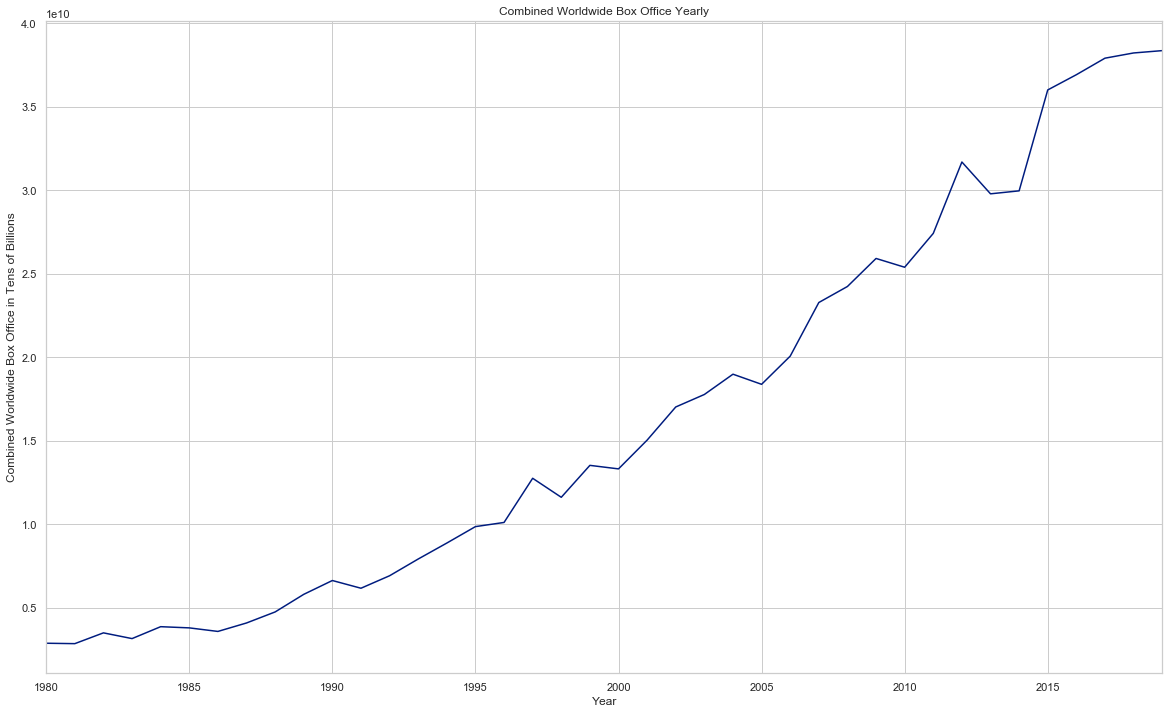

In [26]:
#Questions 1: What is the trend of the combined Worldwide Box Office Yearly?
# We used a line graph to visually represent the trend of Worldwide Box Office Yearly 
sns.set()
sns.set(style="whitegrid",palette="dark")
fizer, line = plt.subplots(figsize=(20, 12))
sns.lineplot(x="Year", y="Combined Worldwide Box Office", data=df_year, palette='GnBu_d')
line.set(xlabel='Year', ylabel='Combined Worldwide Box Office in Tens of Billions', title='Combined Worldwide Box Office Yearly')
line. set(xlim=(1980, 2019));
#Unhash below to download chart
#fizer.savefig('Combined Worldwide Box Office Yearly.png', bbox_inches='tight');

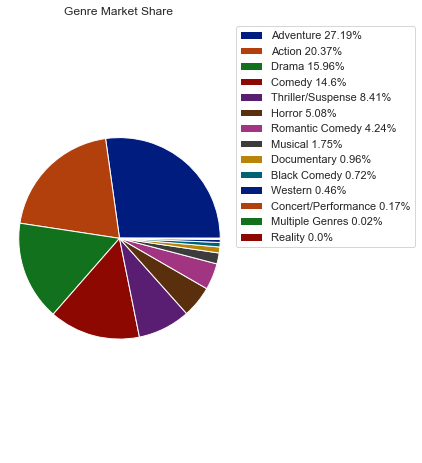

In [27]:
#Question 2: What is the Marketshare of all the genres
#We used a pie chart to show the percentage of data of a category like genres 
splitting, names = plt.subplots(figsize=(4, 8))
plt.pie(my_data)
plt.title('Genre Market Share')
plt.axis('equal')
plt.legend(my_labels, bbox_to_anchor=(1,1))
plt.show();
#Unhash below to download chart
#splitting.savefig('Genre Market Share.png', bbox_inches='tight');

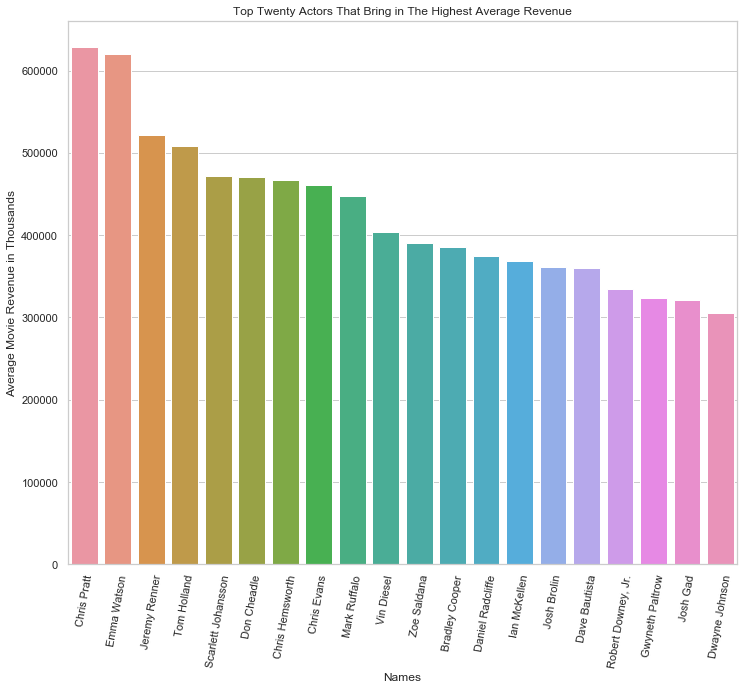

In [28]:
#Questions 3: Who are the top twenty actors that bring in the highest average revenue?
#We used a barchart because actors are categorical and the y axis can represent cooresponding numerical values  
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12, 10))
y = df_of_actors_10['Average/1000']
x = df_of_actors_10.Name
sns.set(style='whitegrid')
ax = sns.barplot(x=x, y= y, data=df_of_actors_10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set(xlabel='Names', ylabel='Average Movie Revenue in Thousands', title='Top Twenty Actors That Bring in The Highest Average Revenue')
fig = plt.gcf()
#Unhash below to download chart
#fig.savefig('Top Twenty Actors That Bring in The Highest Average Revenue.png', bbox_inches='tight');

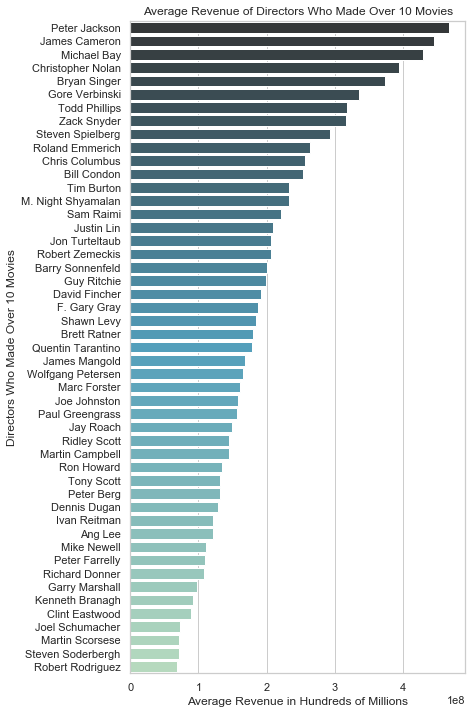

In [29]:
#Question 4: Which directors made over 10 movies and brought in the highest average revenue per movie?
#We used a barchart because directors are categorical and the y axis can represent cooresponding numerical values  
sns.set(style="whitegrid",palette="dark")
direct, names = plt.subplots(figsize=(6, 12))
sns.barplot(x="Average", y="Name", data=dfed, label="Average", palette='GnBu_d')
names.set(xlabel='Average Revenue in Hundreds of Millions', ylabel='Directors Who Made Over 10 Movies', title='Average Revenue of Directors Who Made Over 10 Movies');
#Unhash below to download chart
#direct.savefig('Average Revenue of Directors Who Made Over 10 Movies.png', bbox_inches='tight');

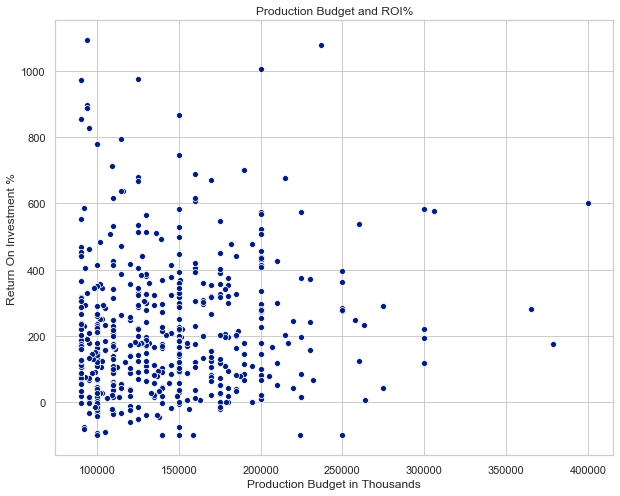

In [30]:
#Question 5: What is the relationship between production budget and ROI?
#We selected movies that had over a 90million dollar budget. We think Microsoft should produce a movie around that budget.
#We used a scatter to show the relationship between production budget and ROI, also to show that the two are not correlated
scattering, names = plt.subplots(figsize=(10, 8))
regress = sns.scatterplot(x='Production Budget in Thousands', y='ROI %', data=budgeting)
regress.set(xlabel='Production Budget in Thousands', ylabel='Return On Investment %', title='Production Budget and ROI%')
scattering = plt.gcf();
#Unhash below to download chart
#scattering.savefig('Production Budget and ROI%.png', bbox_inches='tight');

In [31]:
budgeting.drop(['Numbers','Movie','Standardize', 'Production Budget','Domestic Gross', 'Worldwide Gross'], axis =1)
budgeting['Release Date'] = pd.DatetimeIndex(budgeting['Release Date']).year
budgeting.drop(['Numbers','Movie','Standardize', 'Production Budget','Domestic Gross', 'Worldwide Gross'], axis =1, inplace = True)

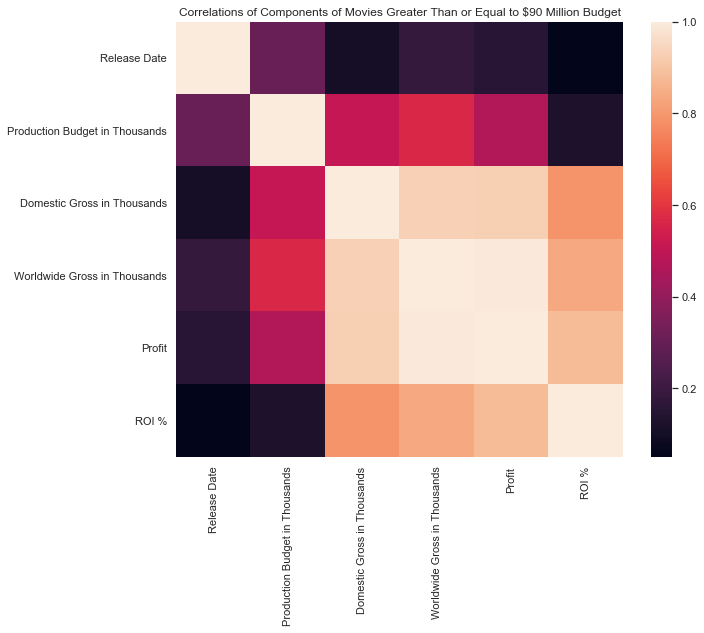

In [32]:
#Question_6: What is the Correlation of different metrics used relavent to Movies Greater Than or Equal To $100 Million Budget
#We used a correlation table heatmap because we want to show the relationship between different financial components that make a successful movie
data= budgeting
fmapping, heatmapping = plt.subplots(figsize=(10, 8))
heatmapping= sns.heatmap(data.corr(), square=False)
heatmapping.set(title='Correlations of Components of Movies Greater Than or Equal to $90 Million Budget')
plt.show();
#Unhash below to download chart
#fmapping.savefig('Correlations of Components of Movies Greater Than or Equal to $90 Million Budget.png', bbox_inches='tight');


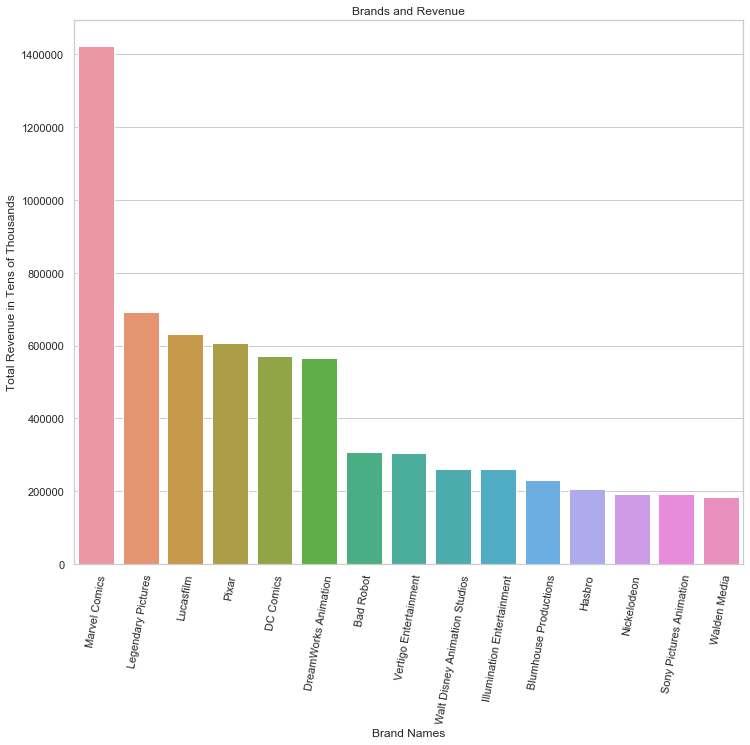

In [33]:
#Question 7: Who are the competiters and how much revenue do they bring in?
#We used a barchart because competiters are categorical and the y axis can represent cooresponding numerical values  
brand, ax = plt.subplots(figsize=(12, 10))
sns.set(style='whitegrid')
ax = sns.barplot(x='Brand', y= 'Total', data=competing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set(xlabel='Brand Names', ylabel='Total Revenue in Tens of Thousands', title= 'Brands and Revenue')
fig = plt.gcf()
#Unhash below to download chart
#brand.savefig('Brands and Revenue.png', bbox_inches='tight');


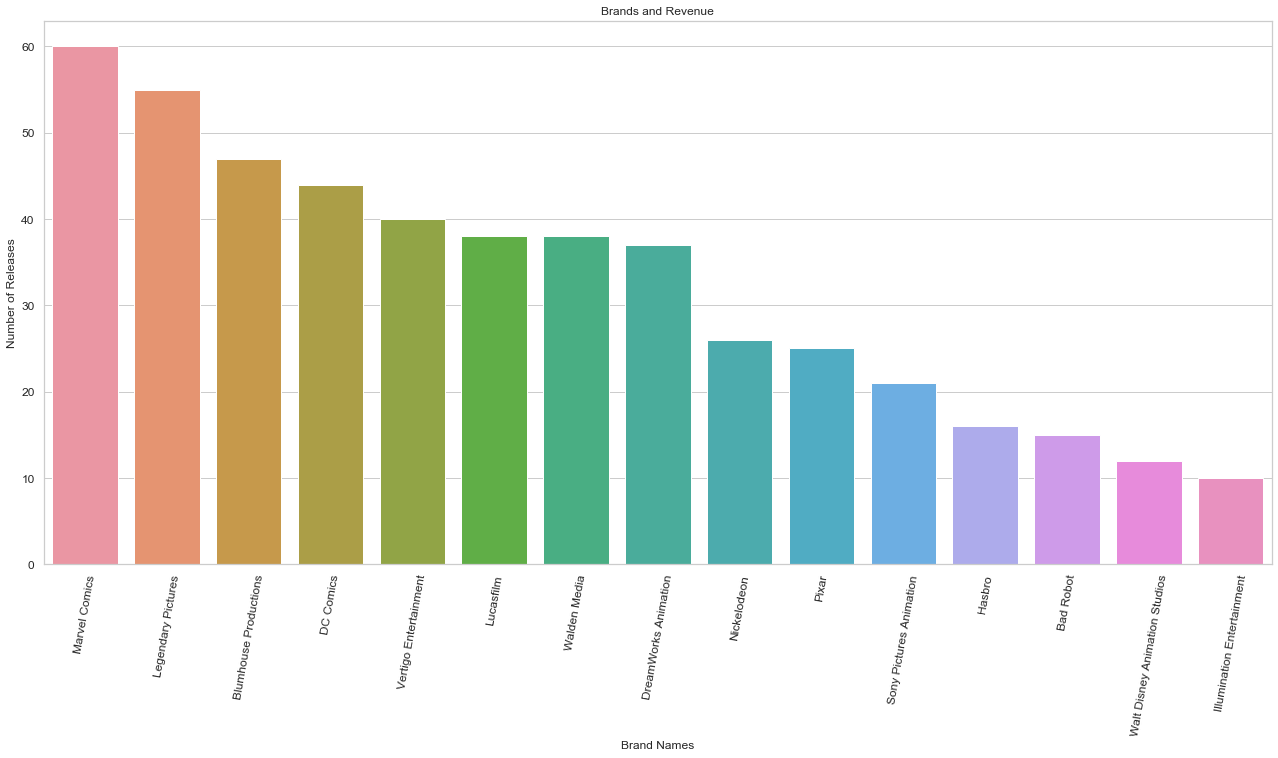

In [34]:
competing.Releases = competing.Releases.map(lambda x: int(x))
competing.sort_values(['Releases'], ascending = False, inplace = True)
brand, ax = plt.subplots(figsize=(22, 10))
sns.set(style='whitegrid')
ax = sns.barplot(x='Brand', y= 'Releases', data=competing)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.tick_params(labelsize=12)
ax.set(xlabel='Brand Names', ylabel='Number of Releases', title= 'Brands and Revenue')
fig = plt.gcf()
#Unhash below to download chart
#brand.savefig('Brands and Revenue.png', bbox_inches='tight')